# Tutorial 09

As you may already know, stars go through several stages in its life cycle as they evolve. They spend much of their time in the 'main sequence' where they burn hydrogen at the core (like our Sun currently) and once they exhaust all the core hydrogen they evolve into red giants and then depending on their initial masses, follow different paths of evolution (read more on stellar evolution here)

Now as a star evolves through all these stages, its temperature changes and so does its luminosity. A nice way therefore, to study stars, is to plot their luminosity and temperature at every stage. Such a plot is called a Hertzsprung–Russell (HR) diagram .

But obviously we cannot look at a single star and study its evolution as a star takes billions of years to evolve, so we study stars at different stages of their evolution. A very good place to find stars of different ages together, is star clusters and particularly globular clusters as they tend to be quite old and hence contain stars in almost every stage. So we take all the stars in the cluster, and plot their HR diagram.

Now in the diagram itself, temperature is plotted on the x-axis, but in reverse, i.e, temperature decreases on moving away from origin on the x axis, while luminosity is plotted on the y axis as usual. But instead of plotting temperature, we plot something called as 'color', which is the difference between the magnitudes of the star directly observed in different wavelength bands. This color turns out to increase as temperature decreases. Similarly for the luminosity, we plot the magnitude in a given wavelength band, and as we have seen before, higher the luminosity, lower the magnitude.

Your task:

1. To plot the HR diagram (or rather the color-magnitude diagram) of the given cluster, in different color bands. (See explanation below)

2. Once you have made 4 such plots, put them in a 2 by 2 subplot grid with both the x and y axes shared and each subplot and the axes labeled.

The data has been provided to you in the 'NGC5272.csv', which contains data for the globular cluster M3. The columns indicate different wavelength bands, and your job is to plot HR diagrams for pairwise filters, sequentially, i.e., F275W vs F275W-F336W, F336W vs F336W-F438W, F438W vs F438W-F606W and F606W vs F606W-F814W. The last column gives the probability of individual stars (you have encountered this before; -1.0 indicates data for the given star is not available). Use this probability to filter out low probability stars, and ensure the orientation of the axes based on the properties of the HR diagram mentioned above.

3. Based on your plots try to reason which color is the best to study the cluster in, and why.

--------------------------------------------------------------------------------------------------------------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
M3_cluster = np.loadtxt("NGC5272.csv", delimiter='\t', skiprows=1)
print(M3_cluster)
print(M3_cluster.shape)

[[ 1.00000e+00  1.96803e+01  1.91636e+01 ...  1.89939e+01  1.85383e+01
   9.64000e+01]
 [ 2.00000e+00  1.97782e+01  1.92063e+01 ...  1.90405e+01  1.85878e+01
   9.68000e+01]
 [ 3.00000e+00  1.71804e+01  1.64154e+01 ...  1.54398e+01  1.51698e+01
   9.75000e+01]
 ...
 [ 9.49870e+04  2.00466e+01  1.95160e+01 ...  1.93456e+01  1.88825e+01
   9.78000e+01]
 [ 9.49880e+04  2.06008e+01  2.00010e+01 ...  1.98147e+01  1.93144e+01
  -1.00000e+00]
 [ 9.49890e+04  2.18890e+01  2.09530e+01 ...  2.05841e+01  2.00423e+01
  -1.00000e+00]]
(94989, 7)


In [3]:
M3_cluster = M3_cluster[M3_cluster[:, -1]>= 90]
print(M3_cluster)
print(M3_cluster.shape)

[[1.00000e+00 1.96803e+01 1.91636e+01 ... 1.89939e+01 1.85383e+01
  9.64000e+01]
 [2.00000e+00 1.97782e+01 1.92063e+01 ... 1.90405e+01 1.85878e+01
  9.68000e+01]
 [3.00000e+00 1.71804e+01 1.64154e+01 ... 1.54398e+01 1.51698e+01
  9.75000e+01]
 ...
 [9.49450e+04 2.04197e+01 1.98427e+01 ... 1.96546e+01 1.91801e+01
  9.66000e+01]
 [9.49500e+04 2.01984e+01 1.96068e+01 ... 1.93771e+01 1.88426e+01
  9.48000e+01]
 [9.49870e+04 2.00466e+01 1.95160e+01 ... 1.93456e+01 1.88825e+01
  9.78000e+01]]
(68177, 7)


In [4]:
diff1 = M3_cluster[:, 1] - M3_cluster[:, 2]
diff2 = M3_cluster[:, 2] - M3_cluster[:, 3]
diff3 = M3_cluster[:, 3] - M3_cluster[:, 4]
diff4 = M3_cluster[:, 4] - M3_cluster[:, 5]

color_cols = np.column_stack((diff1, diff2, diff3, diff4))

M3_cluster_updated = np.hstack((M3_cluster, color_cols))
print(M3_cluster_updated)
print(M3_cluster_updated.shape)

[[ 1.00000e+00  1.96803e+01  1.91636e+01 ... -3.92400e-01  5.62100e-01
   4.55600e-01]
 [ 2.00000e+00  1.97782e+01  1.92063e+01 ... -3.72300e-01  5.38100e-01
   4.52700e-01]
 [ 3.00000e+00  1.71804e+01  1.64154e+01 ...  4.10000e-02  9.34600e-01
   2.70000e-01]
 ...
 [ 9.49450e+04  2.04197e+01  1.98427e+01 ... -3.80000e-01  5.68100e-01
   4.74500e-01]
 [ 9.49500e+04  2.01984e+01  1.96068e+01 ... -4.09100e-01  6.38800e-01
   5.34500e-01]
 [ 9.49870e+04  2.00466e+01  1.95160e+01 ... -3.84300e-01  5.54700e-01
   4.63100e-01]]
(68177, 11)


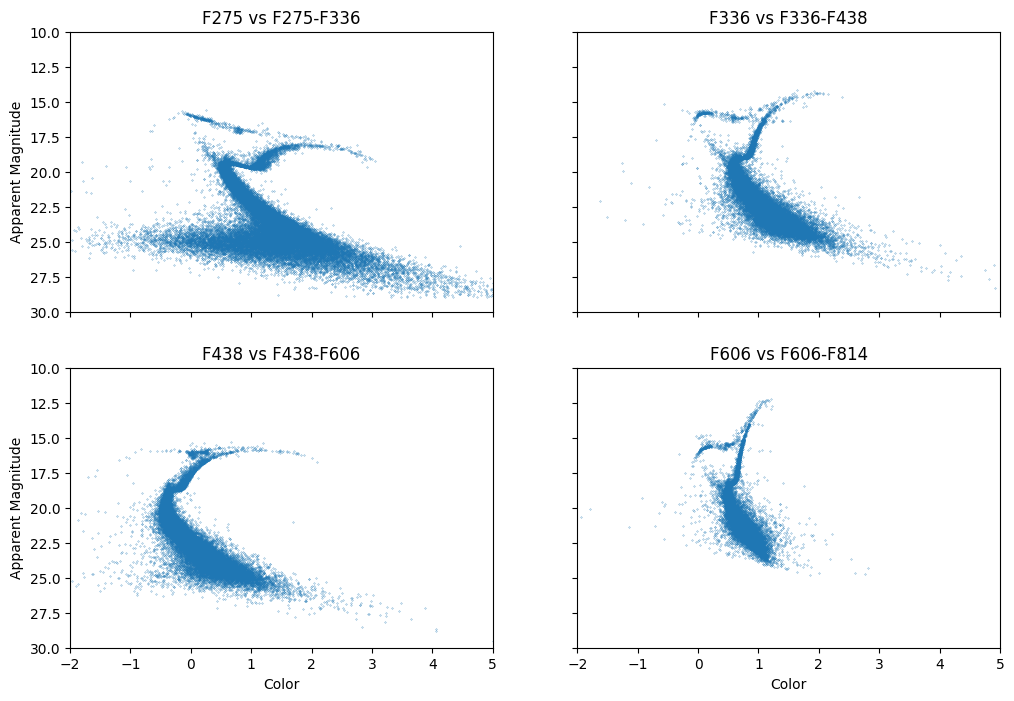

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex = True, sharey = True, figsize=(12,8))

axes[0,0].scatter(M3_cluster_updated[:, 7], M3_cluster_updated[:, 1], s=0.05)
axes[1,0].scatter(M3_cluster_updated[:, 8], M3_cluster_updated[:, 2], s=0.05)
axes[0,1].scatter(M3_cluster_updated[:, 9], M3_cluster_updated[:, 3], s=0.05)
axes[1,1].scatter(M3_cluster_updated[:, 10], M3_cluster_updated[:, 4], s=0.05)


for ax in axes.flat:
    ax.set(xlim=[-2.0, 5])
    ax.set(ylim=[30, 10])

axes[1,0].set_xlabel('Color')
axes[1,1].set_xlabel('Color')
axes[1,0].set_ylabel('Apparent Magnitude')
axes[0,0].set_ylabel('Apparent Magnitude')

axes[0,0].set_title('F275 vs F275-F336')
axes[0,1].set_title('F336 vs F336-F438')
axes[1,0].set_title('F438 vs F438-F606')
axes[1,1].set_title('F606 vs F606-F814')

plt.show()
#fig.savefig("Tutorial_09_result.pdf",
            #format="pdf",
            #bbox_inches="tight",
            #dpi=300) 

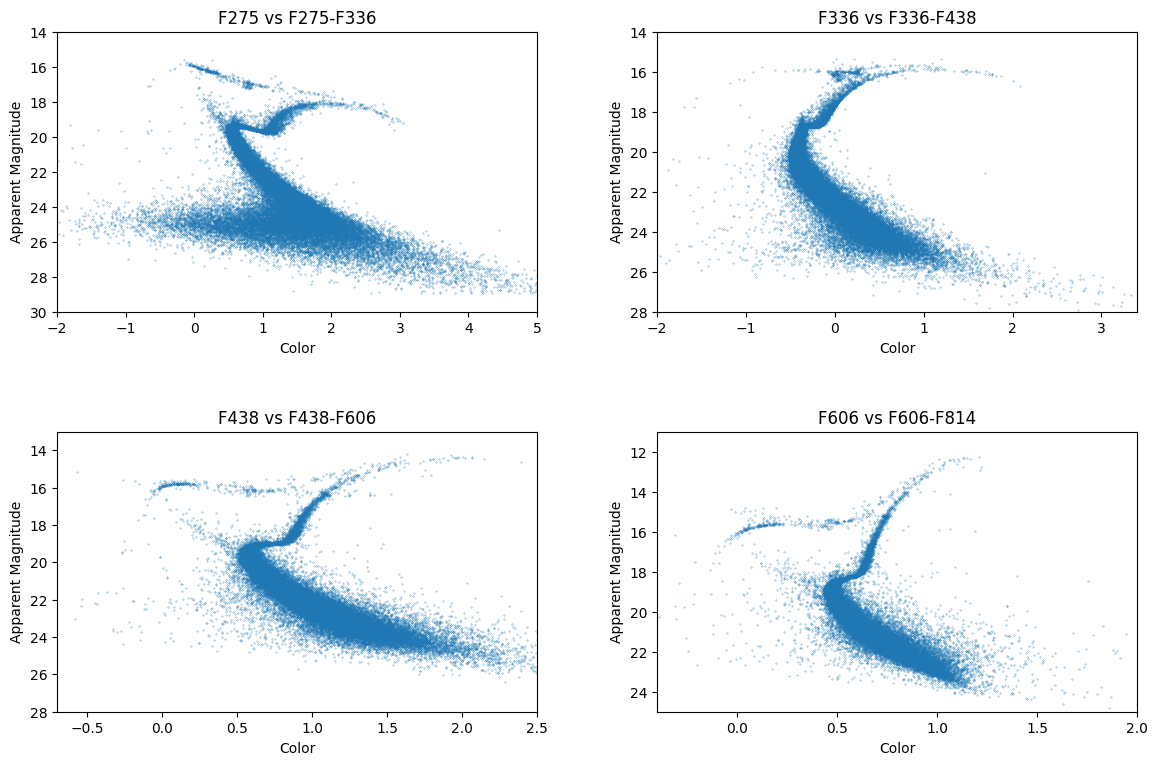

In [6]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_axes([0.1, 0.6, 0.4, 0.35], ylim=(30,14), xlim=(-2.0, 5), xlabel='Color', ylabel='Apparent Magnitude')
ax2 = fig.add_axes([0.6, 0.6, 0.4, 0.35], ylim=(28,14), xlim=(-2.0, 3.4), xlabel='Color', ylabel='Apparent Magnitude')
ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.35], ylim=(28,13), xlim=(-0.7, 2.5), xlabel='Color', ylabel='Apparent Magnitude')
ax4 = fig.add_axes([0.6, 0.1, 0.4, 0.35], ylim=(25,11), xlim=(-0.4, 2), xlabel='Color', ylabel='Apparent Magnitude')

ax1.set_title('F275 vs F275-F336')
ax2.set_title('F336 vs F336-F438')
ax3.set_title('F438 vs F438-F606')
ax4.set_title('F606 vs F606-F814')

ax1.scatter(M3_cluster_updated[:, 7], M3_cluster_updated[:, 1], s=0.05)
ax2.scatter(M3_cluster_updated[:, 8], M3_cluster_updated[:, 2], s=0.05)
ax3.scatter(M3_cluster_updated[:, 9], M3_cluster_updated[:, 3], s=0.05)
ax4.scatter(M3_cluster_updated[:, 10], M3_cluster_updated[:, 4], s=0.05)

for ax in axes.flat:
    ax.set(xlim=[-2.0, 5])
    ax.set(ylim=[30, 10])

plt.show()
#fig.savefig("Tutorial_09_result_alternate.pdf",
            #format="pdf",
            #bbox_inches = "tight",
            #dpi=300) 

F275 vs F275-F336 is the best plot and F275 is the best wavelength to study the M3 cluster because its H-R diagram is more enriched meaning stars at each stage on their evolution are observed in F275 wavelength band.

The stages of stellar evolution depicted in the plots are:

Main sequence - Lower right till the bend

Turn off point - Bending point

Subgiant phase - Relatively constant magnitude line from turn off towards redder color or lower temp.

Red giant phase - Continuing from end of subgiant phase towards redder color and lower magnitude (greater brightness).

Horizontal giant branch - Relatively constant magnitude line towards bluer region, left of the red giant branch.